# about this notebook
this is copy of [EleMisi/ConditionalVAE/notebooks/Image_Generation.ipynb](https://github.com/EleMisi/ConditionalVAE/blob/master/notebooks/Image_Generation.ipynb) on github. but modified.

# Define the model

In [1]:
# Hyper-paramters
label_dim = 26
image_dim = [1024, 1024, 6]
latent_dim = 128
beta = 0.65

batch_size = 4

In [2]:
import tensorflow as tf
from elemisi_cvae.src.ConvolutionalCondVAE import ConvCVAE, Decoder, Encoder

# Model
encoder = Encoder(latent_dim)
decoder = Decoder(batch_size = batch_size)
model = ConvCVAE(
                encoder,
                decoder,
                batch_size = batch_size,
                label_dim = label_dim,
                latent_dim = latent_dim,
                beta = beta,
                image_dim = image_dim)

# Restore checkpoint 

In [3]:
import os

# Checkpoint path
checkpoint_root = "./CVAE{}_{}_1.0_checkpoint".format(latent_dim, beta)
checkpoint_name = "model"
save_prefix = os.path.join(checkpoint_root, checkpoint_name)

# Define the checkpoint
checkpoint = tf.train.Checkpoint(module=model)

In [8]:
# Restore the latest checkpoint

latest = tf.train.latest_checkpoint(checkpoint_root)
if latest is not None:
    checkpoint.restore(latest)
    print("Checkpoint restored:", latest)
else:
  print("No checkpoint!")

Checkpoint restored: ./CVAE128_0.65_0.9_checkpoint/model-7


In [4]:
checkpoint.restore('CVAE128_0.65_1.0_checkpoint/model_40-4')

# Read test data

In [5]:
import argparse
import json
import os
from matplotlib import pyplot as plt
import sys

import tensorflow as tf

from elemisi_cvae.src.utils import batch_generator, convert_batch_to_image_grid, read_data

# Read test_data.pickle 
test_data = read_data("./test_data")

# Saving path for generated images
folder = "./images_{}_{}_1.0/".format(latent_dim, beta)
if not os.path.exists(folder):
    os.mkdir(folder)

# Reconstruction and Generation

In [ ]:
from elemisi_cvae.src.image_generation_utils import image_generation, image_reconstruction

# Image reconstruction
image_reconstruction(model, test_data, save_path=None) 

#target_attr = None 
image_generation(model, test_data, target_attr = None, save_path = None)

# experiments:
reconstruction from train_data

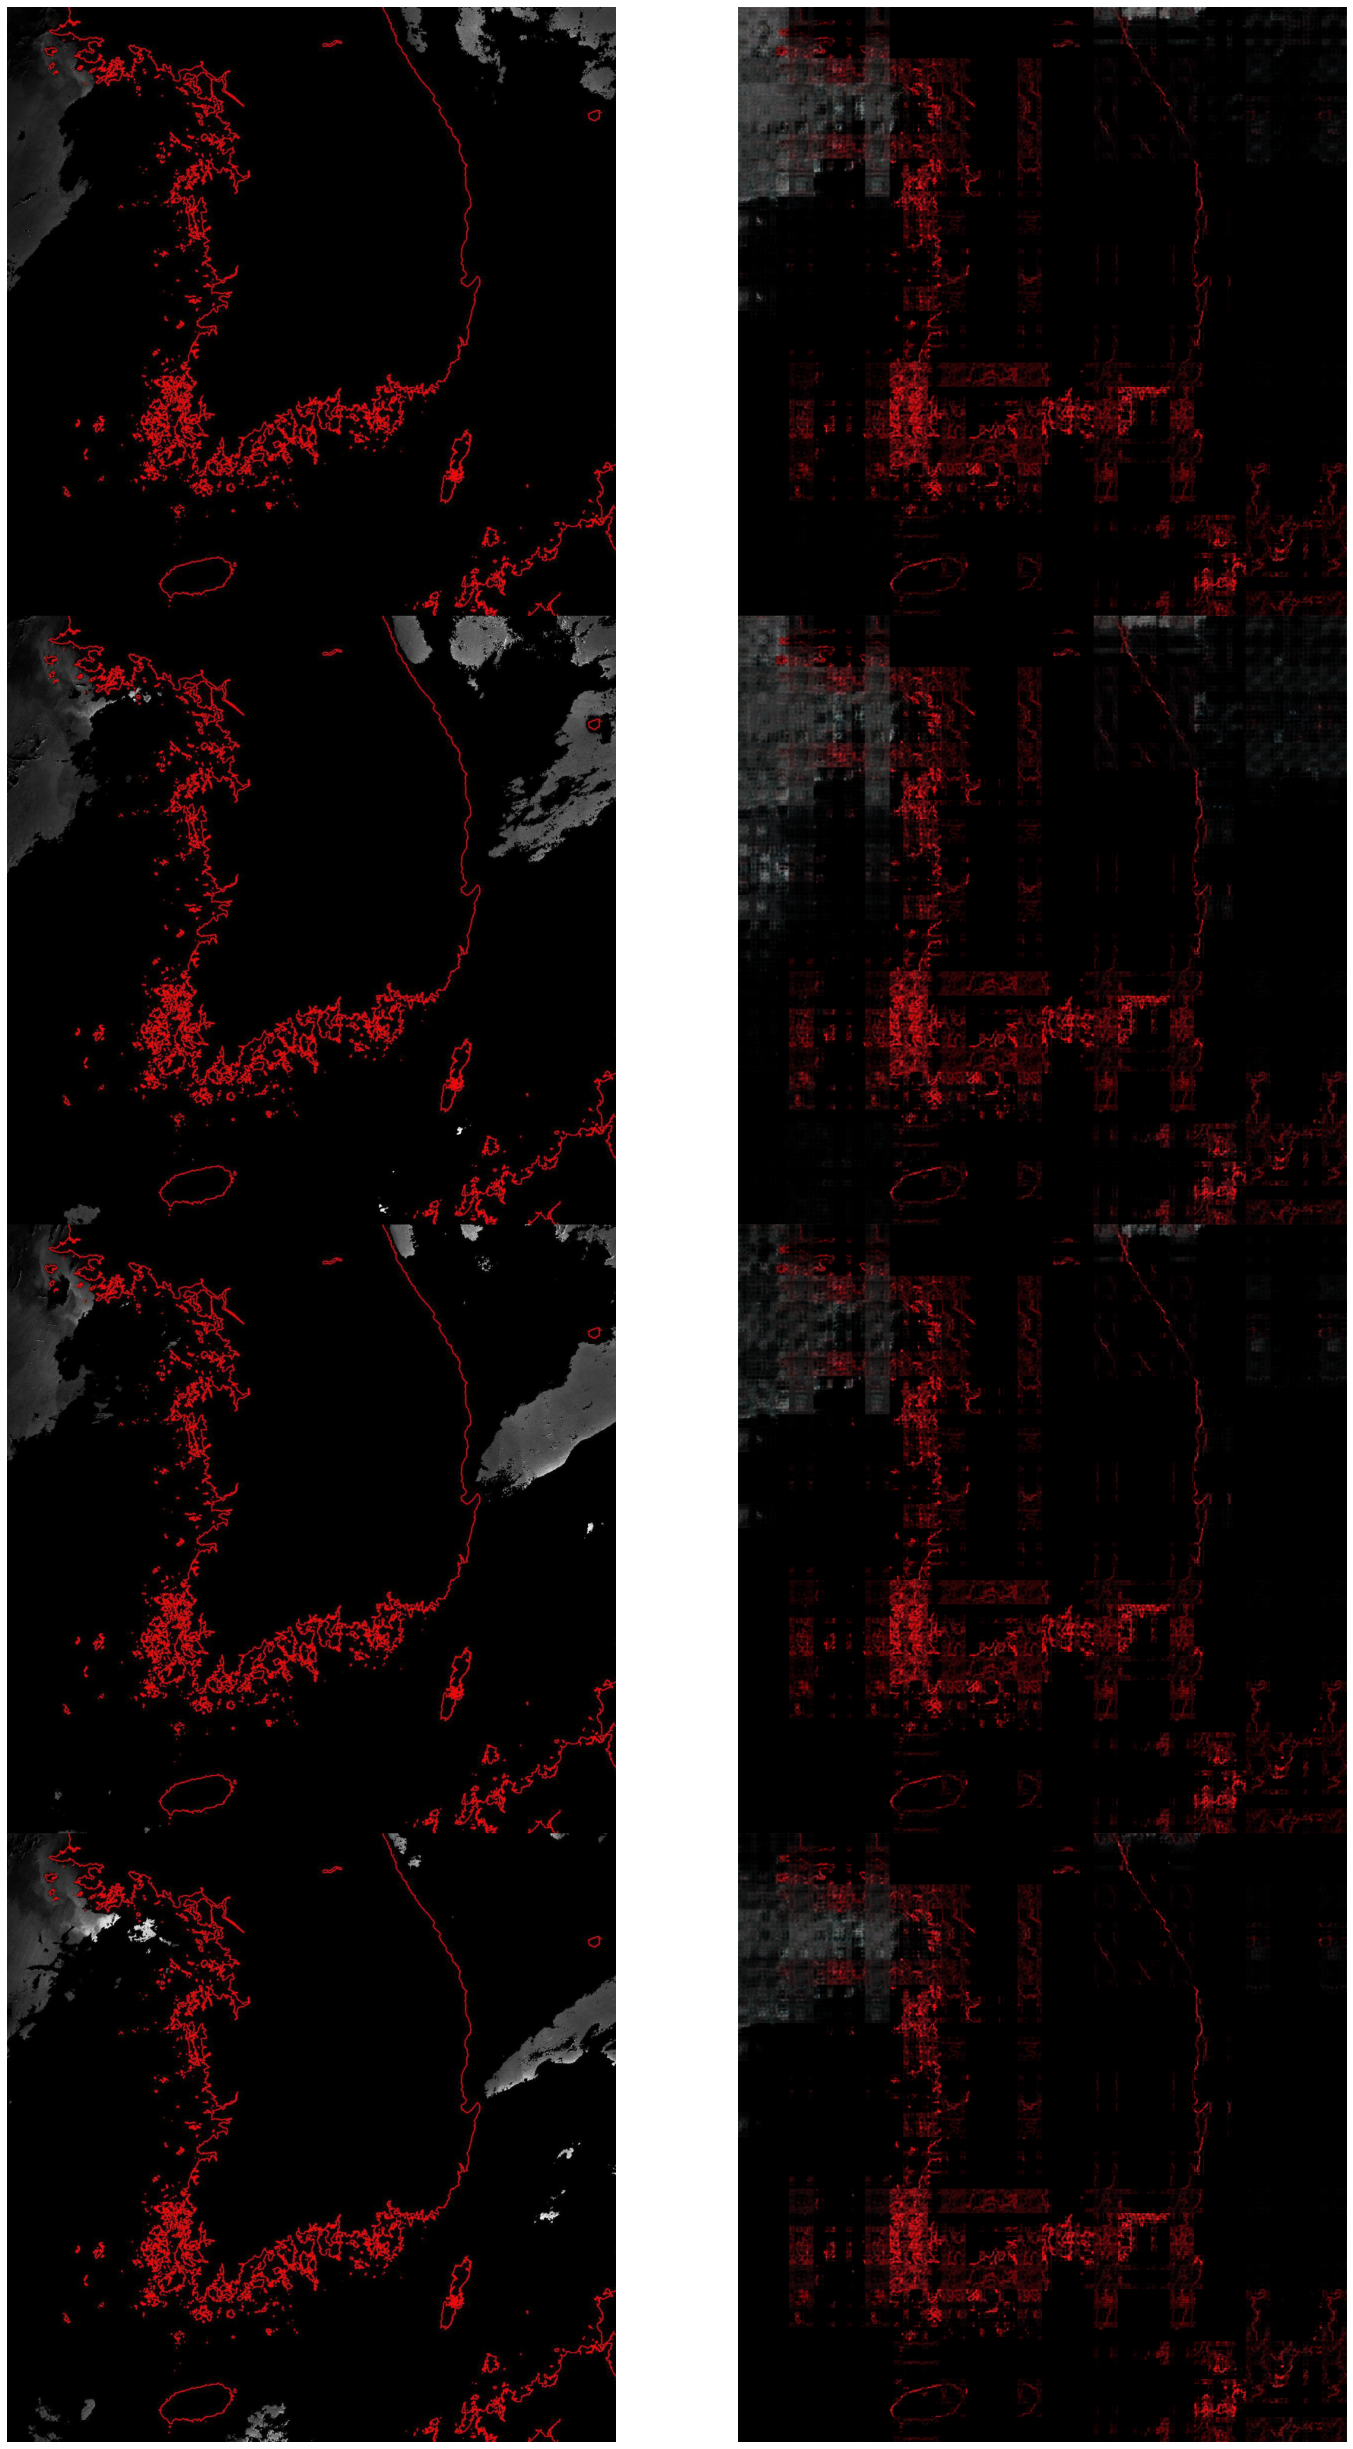

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from elemisi_cvae.src.utils import batch_generator, convert_batch_to_image_grid

def image_reconstruction(model, test_data, save_path=None):
    """
    Reconstructs and plots a bacth of test images.
    """

    batch_gen = batch_generator(test_data['batch_size'], test_data['train_img_ids'], model_name = 'Conv')
    images, labels= next(batch_gen)
    model_output= model((images, labels), is_train = False)
    
    f = plt.figure(figsize=(24,60))
    ax = f.add_subplot(1,2,1)
    ax.imshow(convert_batch_to_image_grid(images))
    plt.axis('off')

    ax = f.add_subplot(1,2,2)
    ax.imshow(convert_batch_to_image_grid(model_output['recon_img'].numpy()))
    plt.axis('off')
    
    if save_path :
        plt.savefig(save_path + "reconstruction.png")

    plt.show()
    plt.clf()

image_reconstruction(model, test_data, save_path=None) 

Generation of 4 images with fixed attributes.


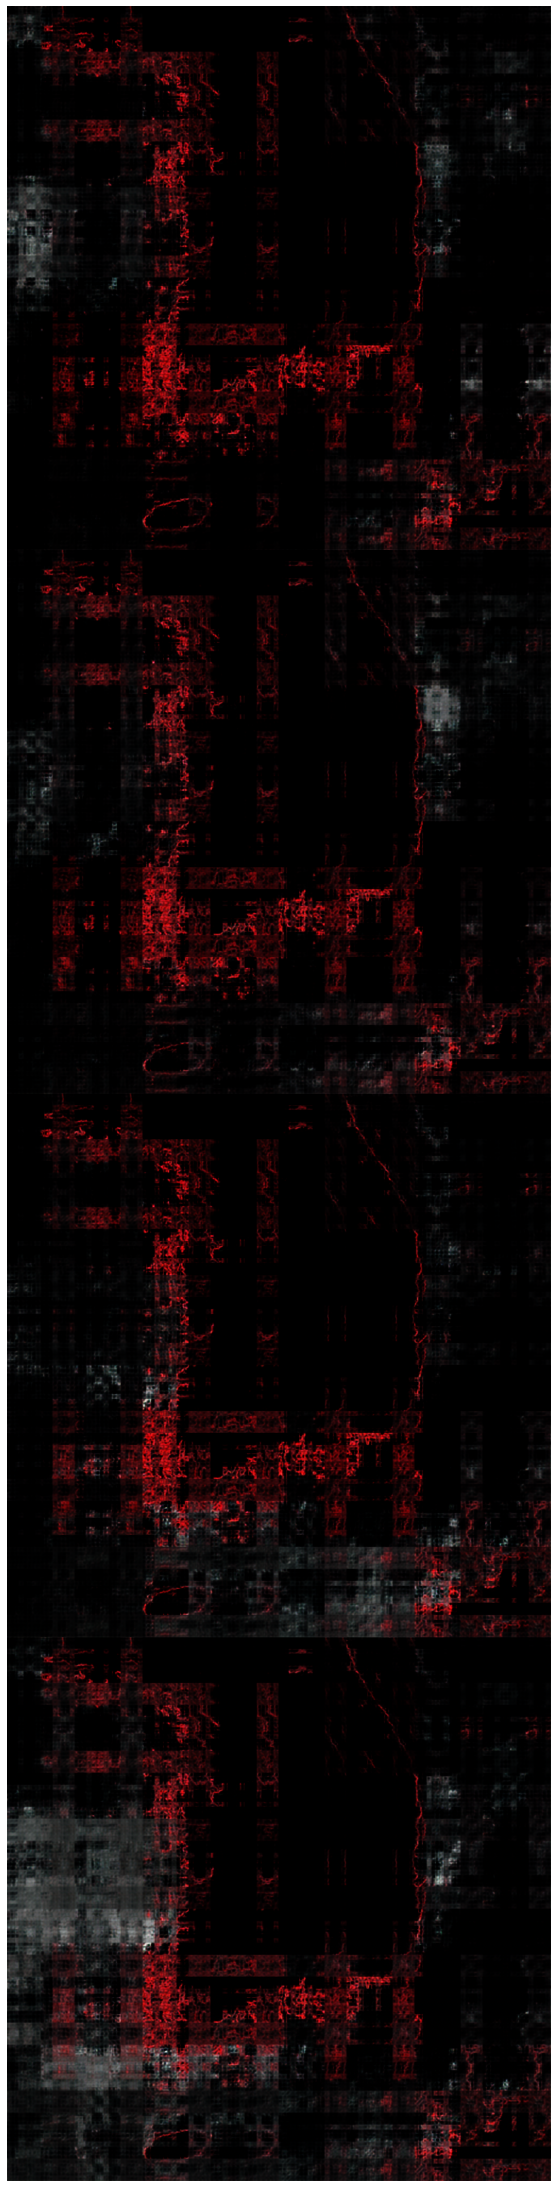

<Figure size 432x288 with 0 Axes>

In [8]:
def image_generation(model, test_data, target_attr = None, save_path = None):
    """
    Generates and plots a batch of images with specific attributes (if given).
    
    - list target_attr : list of desidered attributes [default None]
    """

    # Vector of user-defined attributes.
    if target_attr:       
        pass
   # Vector of attributes taken from the test set.
    else:        
        batch_gen = batch_generator(test_data['batch_size'], test_data['train_img_ids'], model_name = 'Conv')
        _, labels = next(batch_gen)
        print("Generation of 4 images with fixed attributes.")

    z_cond = model.reparametrization(input_label = labels, z_mean = 1.0, z_log_var=0.3)
    logits = model.decoder(z_cond, is_train = False)
    generated = tf.nn.sigmoid(logits)
  
    # Plot
    f = plt.figure(figsize=(10,40))
    ax = f.add_subplot(1,1,1)
    ax.imshow(convert_batch_to_image_grid(generated.numpy()))
    plt.axis('off')

    if save_path :
        plt.savefig(save_path + "generation_" + str(target_attr) + "_.png")
    
    plt.show()
    plt.clf()

image_generation(model, test_data, target_attr = None, save_path = None)